In [1]:
import cv2 as cv
import numpy as np
import os, shutil
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_datasets as tfds # pip install tensorflow_datasets

import splitfolders
import random

In [46]:
print(os.path.getsize("reid_dataset_resize\\15"))


1310720


#### Every other picture


In [15]:
# Resize images in one folder

# print(os.listdir("reid_dataset\\2"))

if not os.path.exists("every_other"):
    os.mkdir("every_other")
    os.mkdir("every_other\\0")
    os.mkdir("every_other\\1")

counter = 0
for image in os.listdir("reid_dataset\\2"):
    print("image:", image)

    if counter % 2 == 0:
        shutil.move(os.path.join("reid_dataset\\2", image), "every_other\\0")
    elif counter % 2 == 1:
        shutil.move(os.path.join("reid_dataset\\2", image), "every_other\\1")

    counter += 1
    # counter = (counter % 2)

    

    # for label in folder:
    #     print()
        # print("label:", label)
        # for img in label:
        #     print("img:", img)
        #     img = cv.imread(img)
        #     # print(img.shape)

image: 2_1000.jpg
image: 2_1001.jpg
image: 2_1002.jpg
image: 2_1003.jpg
image: 2_1004.jpg
image: 2_1005.jpg
image: 2_1006.jpg
image: 2_1007.jpg
image: 2_1008.jpg
image: 2_1009.jpg
image: 2_1010.jpg
image: 2_1011.jpg
image: 2_1012.jpg
image: 2_1013.jpg
image: 2_1014.jpg
image: 2_1015.jpg
image: 2_1016.jpg
image: 2_1017.jpg
image: 2_1018.jpg
image: 2_1019.jpg
image: 2_1020.jpg
image: 2_1021.jpg
image: 2_1022.jpg
image: 2_1023.jpg
image: 2_1024.jpg
image: 2_1025.jpg
image: 2_1026.jpg
image: 2_1027.jpg
image: 2_1028.jpg
image: 2_1029.jpg
image: 2_1030.jpg
image: 2_1031.jpg
image: 2_1032.jpg
image: 2_1033.jpg
image: 2_1034.jpg
image: 2_1035.jpg
image: 2_1036.jpg
image: 2_1037.jpg
image: 2_1038.jpg
image: 2_1039.jpg
image: 2_1040.jpg
image: 2_1041.jpg
image: 2_1042.jpg
image: 2_1043.jpg
image: 2_1044.jpg
image: 2_1045.jpg
image: 2_1046.jpg
image: 2_1047.jpg
image: 2_1048.jpg
image: 2_1049.jpg
image: 2_1050.jpg
image: 2_1051.jpg
image: 2_1052.jpg
image: 2_1053.jpg
image: 2_1054.jpg
image: 2_1

### Dataset splitting 


In [3]:
# x, x_test, y, y_test = train_test_split (x_train,labels, test_size=0.2, train_size=0.8 )
# x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25, train_size =0.75)

In [4]:
# labels = os.listdir("cleaned_reid")
# # print(labels)

# x, x_test, y, y_test = train_test_split (x_train,labels, test_size=0.2, train_size=0.8 )

# Create uqual size of dataset 

In [ ]:
# if not os.path.exists():
    

In [5]:
# Create uqual size of dataset 

# path="cleaned_reid-Copy"
# files=os.listdir(path)
# print(files)
# d=random.choice(files)

# print(f"bild: {d}")

# dir = "cleaned_reid-Copy"

# for folder in os.listdir(dir):
#     print(folder)
#     initial_count = 0
#     sub_dir = os.path.join(dir,folder)
#     for path in os.listdir(sub_dir):
#         if os.path.isfile(os.path.join(sub_dir, path)):
#             initial_count += 1

            
#     print(initial_count)


In [11]:
splitfolders.ratio("cleaned_reid-Copy", output="output",
    seed=1337, ratio=(.6, .4), group_prefix=None, move=False) # default values























































































































































































































































































































































































































































Copying files: 26052 files [00:49, 530.07 files/s]


In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="ds\\train",
    labels="inferred", 
    batch_size=16, 
    image_size=(64,128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 20831 files belonging to 14 classes.
Using 16665 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="ds\\train",
    labels="inferred", 
    batch_size=16, 
    image_size=(64,128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 20831 files belonging to 14 classes.
Using 4166 files for validation.


Copying files: 1504 files [00:20, 668.32 files/s]

In [42]:


# DATASET_SIZE = 100384 

# train_size = int(0.60 * DATASET_SIZE)
# val_size = int(0.20 * DATASET_SIZE)
# test_size = int(0.20 * DATASET_SIZE)

# print(f"Train size: {train_size}\nVal size: {val_size}\nTest size: {test_size} \nDataset size: {DATASET_SIZE}")

# # full_dataset = tf.data.TFRecordDataset(FLAGS.input_file)

# # full_dataset = full_dataset.shuffle(999999999, reshuffle_each_iteration=False)
# print(tf.data.experimental.cardinality(dataset).numpy())
# # print(len(list(dataset.as_numpy_iterator())))
# train_dataset = dataset.take(train_size)
# print(tf.data.experimental.cardinality(dataset).numpy())
# test_dataset = dataset.skip(train_size)
# print(tf.data.experimental.cardinality(dataset).numpy())

# val_dataset = test_dataset.skip(val_size)
# test_dataset = test_dataset.take(test_size)



Train size: 60230
Val size: 20076
Test size: 20076 
Dataset size: 100384
6274
6274
6274
6274


In [41]:
# len(list(train_dataset))
print(tf.data.experimental.cardinality(train_dataset).numpy())
print(train_dataset)
print(tf.data.experimental.cardinality(val_dataset).numpy())
print(val_dataset)
print(tf.data.experimental.cardinality(test_dataset).numpy())
print(test_dataset)

6274
<TakeDataset shapes: ((None, 64, 128, 3), (None,)), types: (tf.float32, tf.int32)>
0
<SkipDataset shapes: ((None, 64, 128, 3), (None,)), types: (tf.float32, tf.int32)>
0
<TakeDataset shapes: ((None, 64, 128, 3), (None,)), types: (tf.float32, tf.int32)>


img: (298, 138, 3), dst: (128, 64, 3)


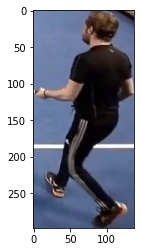

In [22]:
img = cv.imread("1_2.jpg")

dst = cv.resize(img, (64,128))
plt.imshow(img[:,:,::-1])

print(f"img: {img.shape}, dst: {dst.shape}")

# Folder manipulations

In [12]:
print(os.listdir("reid_dataset"))

for folder in os.listdir("reid_dataset"):
    print("folder:", folder)
    

    for label in folder:
        print("label:", label)
        for img in label:
            print("img:", img)
            img = cv.imread(img)
            # print(img.shape)

['1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9']
folder: 1
label: 1
img: 1
folder: 10
label: 1
img: 1
label: 0
img: 0
folder: 11
label: 1
img: 1
label: 1
img: 1
folder: 12
label: 1
img: 1
label: 2
img: 2
folder: 13
label: 1
img: 1
label: 3
img: 3
folder: 14
label: 1
img: 1
label: 4
img: 4
folder: 2
label: 2
img: 2
folder: 3
label: 3
img: 3
folder: 4
label: 4
img: 4
folder: 5
label: 5
img: 5
folder: 6
label: 6
img: 6
folder: 7
label: 7
img: 7
folder: 8
label: 8
img: 8
folder: 9
label: 9
img: 9


In [11]:
# Resize images 

for subdir, dirs, files in os.walk("reid_dataset"):
    for file in files:
        img = cv.imread("file")
        print(img.shape)
        break


AttributeError: 'NoneType' object has no attribute 'shape'

In [3]:
import cv2 as cv
# Resize images & rename images 

if not os.path.exists("reid_dataset_resize"):
    os.mkdir("reid_dataset_resize")

root = "Transformer/data/The_OspreyChallengerSet"
for folder in os.listdir(root):
    print("Start with folder: ", folder)

    save_path = os.path.join("reid_dataset_resize", folder)
    if not os.path.exists(save_path):
        os.mkdir(save_path)

    counter = 0
    folder_path = os.path.join(root, folder)

    # len_pictures = os.listdir(folder_path)

    for img in os.listdir(folder_path):
        # print("img: ", img)

        img_path = os.path.join(folder_path, img)
        img_cv = cv.imread(img_path)

        dst = cv.resize(img_cv,(64,128))

        cv.imwrite(f"{save_path}/{folder}_{counter}.jpg", dst)

        counter += 1
    

    print("Done with folder: ", folder)
   
    


Start with folder:  1
Done with folder:  1
Start with folder:  2
Done with folder:  2
Start with folder:  3
Done with folder:  3
Start with folder:  4
Done with folder:  4


In [10]:
# Rename the jpg picture names while keeping the class number correct
# Folder and subfolders do need to preexist before runnig. Make sure to create all class folders before

for subdir, dirs, files in os.walk("re-id_cleaned\\reid_dataset_v4_resized\\reid_dataset_v4"):
    #counter = 0
    for counter, file in enumerate(files):
        print(f" subdir {subdir}, file {file}")

        os.rename(f"./re-id_cleaned\\reid_dataset_v4_resized\\reid_dataset_v4/{subdir[-2:]}/{file}", f"./reid_dataset/{subdir[-2:]}/{subdir[-2:]}_{counter}.jpg")
        #counter +=1
    

root = "reid_dataset_resize"
for folder in os.listdir(root):
    print("Start with folder: ", folder)
    


    kill

 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_0.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_1.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_10.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_100.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_1000.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_1001.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_1002.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_1003.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_1004.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_1005.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_1006.jpg
 subdir re-id_cleaned\reid_dataset_v4_resized\reid_dataset_v4\1, file 1_1007.jpg
 subdir re-id_cleaned\reid_dataset_v4

In [4]:
# Renaming jpg in folder within folders whit counting while keeping the class number correct
for subdir, dirs, files in os.walk("reid_dataset"):
    counter = 0
    for file in files:
        print(f"file {file}, subdir {subdir[-1]}")

        os.rename(f"./reid_dataset/{subdir[-1]}/{file}", f"./reid_dataset/{subdir[-1]}/{subdir[-1]}_{counter}.jpg")
        counter +=1

file test1_1.jpg, subdir 1
file test1_10001.jpg, subdir 1
file test1_10004.jpg, subdir 1
file test1_10007.jpg, subdir 1
file test1_10011.jpg, subdir 1
file test1_10015.jpg, subdir 1
file test1_10018.jpg, subdir 1
file test1_10023.jpg, subdir 1
file test1_10026.jpg, subdir 1
file test1_10029.jpg, subdir 1
file test1_1003.jpg, subdir 1
file test1_10032.jpg, subdir 1
file test1_10035.jpg, subdir 1
file test1_10038.jpg, subdir 1
file test1_10041.jpg, subdir 1
file test1_10044.jpg, subdir 1
file test1_10047.jpg, subdir 1
file test1_10050.jpg, subdir 1
file test1_10053.jpg, subdir 1
file test1_10056.jpg, subdir 1
file test1_10059.jpg, subdir 1
file test1_10062.jpg, subdir 1
file test1_10065.jpg, subdir 1
file test1_10068.jpg, subdir 1
file test1_1007.jpg, subdir 1
file test1_10071.jpg, subdir 1
file test1_10074.jpg, subdir 1
file test1_10077.jpg, subdir 1
file test1_10080.jpg, subdir 1
file test1_10083.jpg, subdir 1
file test1_10086.jpg, subdir 1
file test1_10089.jpg, subdir 1
file test1_100